<a href="https://colab.research.google.com/github/nikitagordeev10/8-1-course-university-introduction-unit-testing-lab-1/blob/main/%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%B4%D0%B0%D0%BD%D1%82%D0%B5%D1%81_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт библиотек**

In [ ]:
import numpy as np
import pandas as pd
import re
import random
!pip install pymorphy2
import pymorphy2
import dill

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.text as text
import matplotlib.cm as cm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

!pip install catboost
from catboost import CatBoostClassifier, Pool

!pip install category_encoders
from category_encoders.binary import BinaryEncoder

# **Подключение Google Диска (Тимофей)**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Исправьте путь до папки на вашем гугл диске:
gc_path = r"/content/gdrive/MyDrive/НейроДантес/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Очистка данных (не работает)**

In [ ]:
df = pd.read_csv(gc_path+'train.csv', on_bad_lines='skip', sep=';')

## **"subject_type" (Никита)**

In [ ]:
# def clean_subject_type(*args, **kwargs):
#   tbl_sb = pd.Series(df.subject_type)
#   selected = pd.get_dummies(tbl_sb)

#   del df['subject_type']
#   df = pd.concat([df, selected], axis=1)
#   return df

## **"period" (Артём)**

In [ ]:
# def clean_period(*args, **kwargs):
#   tbl_period = pd.Series(df.period)
#   pd.get_dummies(tbl_period)

In [ ]:
  # for i in range(12):
  #   i = i+1
  #   if (i < 10):
  #     i = f'0{i}'
  #   df = df.replace({'period' : { f'2020-{i}-01' : int(i)}})


  # s = pd.Series(df.period)
  # k = pd.get_dummies(s)

  # column_list = []
  # i_list = []

  # for column in k:
  #   column_list.append(int(column))
    
  # for j in range(12):
  #   i_list.append(j+1)

  # result=list(set(i_list) - set(column_list))
  # result.reverse()

  # for i in result:
  #   k.insert(0, i, 0)

  # del df['period']
  # df = pd.concat([df, k], axis=1)

## **"hex" (Тимофей)**

`hex из 16сс в 10сс`

In [ ]:
# def clean_hex(*args, **kwargs):
#   b16 = lambda x: int(x,16)
#   df['hex'] = df['hex'].apply(b16)

## **"subject_name" (Никита)**

In [ ]:
# def clean_subject_name(*args, **kwargs):
#   data = pd.DataFrame(df.subject_name)

#   bn = BinaryEncoder(df.subject_name)
#   data_subject_name = bn.fit_transform(data.values)

In [ ]:
  # data_subject_name

In [ ]:
  # total_cols=len(data_subject_name.axes[1]) 
  # total_cols

In [ ]:
  # num_array = []
  # for i in range (0, total_cols):
  #   num_array.append("subject_name_"+str(i))
  # num_array

In [ ]:
  # data_subject_name.columns = num_array
  # data_subject_name

In [ ]:
  # del df['subject_name']
  # df = pd.concat([df, data_subject_name], axis=1, join='outer') 

In [ ]:
  # df

## **"city_name" (Никита)**

In [ ]:
# def clean_city_name(*args, **kwargs):
#   data = pd.DataFrame(df.city_name)

#   bn = BinaryEncoder(df.city_name)
#   data_city_name = bn.fit_transform(data.values)

In [ ]:
  # del df['city_name']
  # df = pd.concat([df, data_city_name], axis=1, join='outer') 

# **Обработка данных (не работает)**

`Подсчёт 0 и 1 в label`

In [ ]:
# col = 'label'
# dft = df.groupby([col])[col].count()
# dft

In [ ]:
# total_rows=len(df.axes[0]) 
# total_cols=len(df.axes[1]) 
# print("Number of Rows: "+str(total_rows))
# print("Number of Columns: "+str(total_cols))

## **Дозаполнение пустых ячеек (Дмитрий)**

`Подставить в f наиболее часто встречающееся значение`

In [ ]:
# def filling_empty_cells(*args, **kwargs):
#   fPopular = pd.DataFrame({})
#   i = 1
#   while i < 31:
#     collumn = 'f' + str(i)
#     value = df.groupby([collumn])[collumn].count().sort_values(ascending=False).index[0]
#     fPopular[collumn] = [value]
#     i += 1

`Тест с f заполненными наиболее часто встречающимися`

In [ ]:
  # for i in range(30):
  #   i += 1
  #   column = 'f' + str(i)
  #   df.loc[(df[column] != pd.notna), column] = fPopular.iloc[0][column]

Сохранение подготовленных тренировочных данных

In [ ]:
# df.to_csv('train_df.csv', sep=';', encoding='utf-8')

# **Разработка классификатора, предсказывающего склонность клиента к покупке тарифа домашнего интернета «Игровой»**

## **Обучение моделей**

### **Вариант 1 "TensorFlow Deep Neural Network" (Никита) (не работает)**

`Проблема Tensorflow 1 is unsupported in Colab → не запустить tf.contrib...`

In [ ]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

# import os
# import urllib

# import numpy as np

# !pip install tensorflow==1.14
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

# import os
# import urllib

# import numpy as np

# !pip install tensorflow==1.14
# import tensorflow.compat.v1 as tf

In [ ]:
# # Наборы данных
# TARIFF_TRAINING = (gc_path+'train.csv')
# TARIFF_TEST = (gc_path+'test.csv')

# # Загрузка наборов данных
# training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
#     filename=TARIFF_TRAINING,
#     target_dtype=np.int,
#     features_dtype=np.float32)

# test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
#     filename=TARIFF_TEST,
#     target_dtype=np.int,
#     features_dtype=np.float32)

# # Укажите, что все функции имеют данные реального значения
# feature_columns = [tf.contrib.layers.real_valued_column("", dimension=total_cols)]

# # Построить 3-х слойную DNN
# classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
#                                             hidden_units=[0,1],
#                                             n_classes=2)
# # Определите входные данные для обучения
# def get_train_inputs():
#   x = tf.constant(training_set.data)
#   y = tf.constant(training_set.target)

#   return x, y

# # Подходящая модель
# classifier.fit(input_fn=get_train_inputs, steps=2000)

# # Определите тестовые входные данные
# def get_test_inputs():
#   x = tf.constant(test_set.data)
#   y = tf.constant(test_set.target)

#   return x, y

# # Оценка точности
# accuracy_score = classifier.evaluate(input_fn=get_test_inputs,
#                                       steps=1)["accuracy"]

# print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

# # # Классифицировать нового полоьзователя
# # def new_samples():
# #   return np.array([[6.4, 2.7, 5.6, 2.1]], dtype=np.float32)

# # predictions = list(classifier.predict(input_fn=new_samples))

# # print("Predicted class: {}\n".format(predictions))

### **Вариант 2: "Анасамбли" (Тимофей)**

`Временный код`

In [ ]:
b16 = lambda x: int(x,16)
df['hex'] = df['hex'].apply(b16)

df2 = df.drop(columns=['period', 'subject_type', 'subject_name', 'city_name']).fillna(0)

,label,hex,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,603793132424790015,55.729458,37.516569,0.00101,0.00103,0.00195,0.0,0.0,0.41452,...,0.13027,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01737,0.0
1,1,603793100078317567,55.975851,37.237085,0.00000,0.00027,0.00053,0.0,0.0,0.41452,...,0.08756,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01152,0.0
2,1,603790331166588927,55.622721,37.695121,0.00339,0.00313,0.00439,0.0,0.0,0.41452,...,0.09243,0.00000,0.00000,0.11053,0.57895,0.00526,0.02105,0.00000,0.01540,0.0
3,1,603793099944099839,55.941586,37.157487,0.00048,0.00054,0.00055,0.0,0.0,0.41452,...,0.10192,0.00000,0.00049,0.00000,0.00000,0.00000,0.00000,0.00000,0.01495,0.0
4,1,603793126250774527,55.797494,37.676200,0.00164,0.00179,0.00219,0.0,0.0,0.41452,...,0.09620,0.00000,0.00000,0.14444,0.64444,0.01111,0.04444,0.01111,0.01266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0,603848919486562303,48.364768,134.996232,0.00111,0.00100,0.00110,0.0,0.0,0.15391,...,0.41667,0.26667,0.00000,0.33929,0.78571,0.00000,0.01786,0.03571,0.01667,0.0
294254,0,604351826736709631,43.309803,132.345989,0.00075,0.00065,0.00076,0.0,0.0,0.00643,...,0.42424,0.08333,0.00000,0.09449,0.80315,0.00787,0.00000,0.05512,0.02273,0.0
294255,0,604305726168367103,43.057826,133.155582,0.00018,0.00014,0.00016,0.0,0.0,0.00140,...,0.20000,0.08333,0.00000,0.07547,0.81132,0.00000,0.00000,0.01887,0.00000,0.0
294256,0,603870921261842431,52.908685,158.406443,0.00075,0.00138,0.00119,0.0,0.0,0.08380,...,0.31990,0.08768,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06398,0.0


In [ ]:
df_test = pd.read_csv(gc_path+'test.csv', sep=';')
df_test = df_test.drop(columns=['period', 'subject_type', 'subject_name', 'city_name']).fillna(0)
df_test['hex'] = df_test['hex'].apply(b16)

`Основной код`

In [ ]:
# Подготовка данных 
# df_test = clean_subject_type(df_test)
# df_test = clean_period(df_test)
# df_test = clean_hex(df_test)
# df_test = clean_subject_name(df_test)
# df_test = clean_city_name(df_test)

from sklearn.metrics import confusion_matrix

In [ ]:
# Построить бустинг
cat_model = CatBoostClassifier(random_seed=42, iterations=300)
cat_model.fit(df2.drop(columns=['label']), df2['label'])

# Предсказание 
y_pred = cat_model.predict(df_test.drop(columns=['label']))
confusion_matrix(df_test['label'], y_pred)

Learning rate set to 0.352015
0:	learn: 0.2584942	total: 90.9ms	remaining: 27.2s
1:	learn: 0.1457613	total: 172ms	remaining: 25.6s
2:	learn: 0.1147177	total: 268ms	remaining: 26.6s
3:	learn: 0.1046988	total: 354ms	remaining: 26.2s
4:	learn: 0.1001136	total: 439ms	remaining: 25.9s
5:	learn: 0.0981917	total: 528ms	remaining: 25.9s
6:	learn: 0.0972148	total: 600ms	remaining: 25.1s
7:	learn: 0.0963979	total: 683ms	remaining: 24.9s
8:	learn: 0.0955008	total: 776ms	remaining: 25.1s
9:	learn: 0.0946555	total: 883ms	remaining: 25.6s
10:	learn: 0.0941599	total: 968ms	remaining: 25.4s
11:	learn: 0.0937767	total: 1.06s	remaining: 25.4s
12:	learn: 0.0933783	total: 1.14s	remaining: 25.2s
13:	learn: 0.0931921	total: 1.22s	remaining: 25s
14:	learn: 0.0928873	total: 1.31s	remaining: 24.9s
15:	learn: 0.0926740	total: 1.39s	remaining: 24.7s
16:	learn: 0.0924829	total: 1.48s	remaining: 24.6s
17:	learn: 0.0922261	total: 1.57s	remaining: 24.6s
18:	learn: 0.0920288	total: 1.65s	remaining: 24.4s
19:	learn: 0

array([[149238,    310],
       [  3136,     82]])

In [ ]:
# Построить бустинг
lgb_model = lgb.LGBMClassifier(n_estimators=500)
lgb_model.fit(df2.drop(columns=['label']), df2['label'])

# Оценка точности
y_pred = lgb_model.predict(df_test.drop(columns=['label']))
confusion_matrix(df_test['label'], y_pred)

array([[149276,    272],
       [  3146,     72]])

In [ ]:
# Ансамбль из двух моделей (catboost, lightgbm)
cat_proba = cat_model.predict_proba(df_test.drop(columns=['label']))[:,1:]
lgb_proba = lgb_model.predict_proba(df_test.drop(columns=['label']))[:,1:]
ensemble_pred = np.mean(np.concatenate([cat_proba, lgb_proba], axis=1), axis=1).round()
confusion_matrix(df_test['label'], ensemble_pred)

array([[149328,    220],
       [  3157,     61]])

### **Вариант 3 "Машинное обучение" (Никита) (не работает)**

`Получение имён столбцов`

In [ ]:
# df_1 = pd.read_csv(gc_path+'train_df.csv')
 
# list_of_column_names = list(df_1.columns)

In [ ]:
# # Импорт пакетов проекта
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# import sklearn.preprocessing as preprocessing
# import sklearn.model_selection as model_selection
# import matplotlib.pyplot as plt

# # Чтение csv
# tariff_df = pd.read_csv(r(gc_path+'train_df.csv'), delimiter=";", header=0, index_col='label')
# tariff_df = tariff_df[['venue', 'config', 'surface', 'distance', 'going', 'race_class']]

# # check to see if we have NaN, then drop NaN
# print(tariff_df[tariff_df.isnull().any(axis=1)])
# tariff_df = tariff_df.dropna()

# # encode ordinal columns: config, going, 
# config_encoder = preprocessing.OrdinalEncoder()
# tariff_df['config'] = config_encoder.fit_transform(tariff_df['config'].values.reshape(-1, 1))
# going_encoder = preprocessing.OrdinalEncoder()
# tariff_df['going'] = going_encoder.fit_transform(tariff_df['going'].values.reshape(-1, 1))

# # encode nominal column: venue
# venue_encoder = preprocessing.LabelEncoder()
# tariff_df['venue'] = venue_encoder.fit_transform(tariff_df['venue'])

# **Матрицы ошибок**

## **Feature importance (Тимофей)**

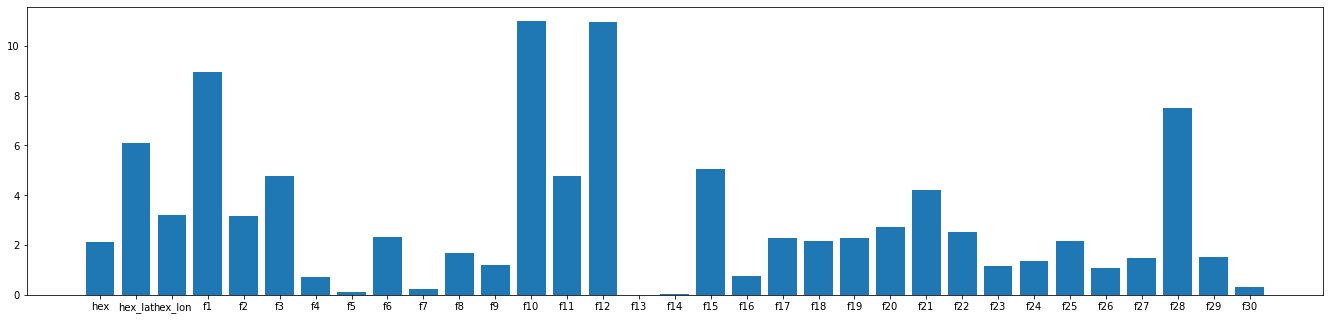

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(df2.drop(columns=['label']).columns, cat_model.feature_importances_)

plt.show()
# 'f4', 'f5', 'f7', 'f13', 'f14', 'f16', 'f23', 'f24', 'f26', 'f30'

## **Таблица (не работает)**

In [ ]:
# from sklearn.metrics import multilabel_confusion_matrix
# vis_arr = multilabel_confusion_matrix(true_labels, preds)

# labels = ["".join("" + str(i)) for i in range(1, 16)]

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# vis_arr[7]

In [ ]:
# from sklearn.metrics import multilabel_confusion_matrix
# vis_arr = multilabel_confusion_matrix(true_labels, preds)

# labels = ["".join("" + str(i)) for i in range(1, 16)]

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=18):

#     df_cm = pd.DataFrame(
#         confusion_matrix, index=class_names, columns=class_names,
#     )

#     try:
#         heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
#         sns.set(font_scale = 1.6)
#     except ValueError:
#         raise ValueError("Confusion matrix values must be integers.")
#     heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
#     heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
#     axes.set_ylabel('True class', fontsize=fontsize)
#     axes.set_xlabel('Predicted class', fontsize=fontsize)
#     axes.set_title("class_" + class_label, fontsize=fontsize)
  

# fig, ax = plt.subplots(15,1,figsize=(4, 15))
# for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr[0:15], labels[0:15]):
#     print_confusion_matrix(cfs_matrix, axes, label, ["False", "True"])
# fig.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=2)
# fig.tight_layout()
# plt.show()

## **Дерево (не работает)**

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np; np.random.seed(42)
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import make_circles # Make a large circle containing a smaller circle in 2d (toy dataset)
# from sklearn.model_selection import train_test_split
# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = 10, 6

# # X - координаты центров кругов, y={0;1} - метки классов -> бинарная классификция
# X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
# X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

# dtree = DecisionTreeClassifier(random_state=42)
# dtree.fit(X_train_circles, y_train_circles)

# # Получаем новые центры кругов
# x_range = np.linspace(X.min(), X.max(), 100)
# xx1, xx2 = np.meshgrid(x_range, x_range) # xx1.shape=(100,100), xx2.shape=(100,100)

# # Классифицируем круги
# y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()]) # y_hat.shape = 10000
# y_hat = y_hat.reshape(xx1.shape) # y_hat.shape = (100, 100)

# # Отрисовка кругов
# plt.contourf(xx1, xx2, y_hat, alpha=0.2) # Отрисовать область, разграничивающую два класса
# plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn') # Отрисовать круги
# plt.title("Дерево решений")
# plt.show()

# b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
# b_dtree.fit(X_train_circles, y_train_circles)

# x_range = np.linspace(X.min(), X.max(), 100)
# xx1, xx2 = np.meshgrid(x_range, x_range)
# y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
# y_hat = y_hat.reshape(xx1.shape)
# plt.contourf(xx1, xx2, y_hat, alpha=0.2)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
# plt.title("Бэггинг(дерево решений)")
# plt.show()

# rf = RandomForestClassifier(n_estimators=300, random_state=42)
# rf.fit(X_train_circles, y_train_circles)

# x_range = np.linspace(X.min(), X.max(), 100)
# xx1, xx2 = np.meshgrid(x_range, x_range)
# y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
# y_hat = y_hat.reshape(xx1.shape)
# plt.contourf(xx1, xx2, y_hat, alpha=0.2)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
# plt.title("Случайный лес")
# plt.show()

# **Результат обучения**

In [ ]:
df_test_final = pd.read_csv(gc_path+'тестовый_датасет/test dataset.csv', sep=';')
df_test_final = df_test_final.drop(columns=['period', 'subject_type', 'subject_name', 'city_name']).fillna(0)
df_test_final['hex'] = df_test_final['hex'].apply(b16)

In [ ]:
cat_proba = cat_model.predict_proba(df_test_final.drop(columns=['label', 'id']))[:,1:]
lgb_proba = lgb_model.predict_proba(df_test_final.drop(columns=['label','id']))[:,1:]
ensemble_pred_final = np.mean(np.concatenate([cat_proba, lgb_proba], axis=1), axis=1)

In [ ]:
client_pred_data = pd.concat([pd.Series(ensemble_pred_final), df_test_final['id']], axis=1)
client_pred_data = client_pred_data.sort_values(by=[0], ascending=False).reset_index().drop(columns=['index'])
client_pred_data = client_pred_data[(client_pred_data.index < np.percentile(client_pred_data.index, 5))]
client_pred_data

,0,id
0,0.940769,52505
1,0.911934,55388
2,0.899573,51559
3,0.890642,1082
4,0.887004,1208
...,...,...
7585,0.080910,142377
7586,0.080901,125320
7587,0.080900,54463
7588,0.080896,11135


In [ ]:
client_pred_data.drop(columns=[0]).to_csv(gc_path + 'final_1.csv', index=False)